100%|██████████| 831/831 [00:00<00:00, 8568.58it/s]


{1: 188, 2: 32, 3: 26, 4: 17, 5: 8, 6: 6, 7: 10, 8: 5, 9: 6, 10: 8, 11: 5, 12: 7, 13: 4, 14: 4, 15: 4, 16: 5, 17: 5, 18: 1, 19: 6, 20: 0, 21: 1, 22: 4, 23: 2, 24: 5, 25: 1, 26: 2, 27: 1, 28: 3, 29: 4, 30: 1, 31: 3, 32: 2, 33: 1, 34: 3, 35: 0, 36: 4, 37: 2, 38: 2, 39: 3, 40: 4, 41: 4, 42: 5, 43: 0, 44: 1, 45: 2, 46: 1, 47: 2, 48: 1, 49: 1, 50: 1, 51: 1, 52: 2, 53: 2, 54: 0, 55: 2, 56: 5, 57: 0, 58: 1, 59: 3, 60: 1, 61: 1, 62: 1, 63: 2, 64: 3, 65: 0, 66: 1, 67: 3, 68: 0, 69: 1, 70: 1, 71: 0, 72: 1, 73: 1, 74: 1, 75: 2, 76: 2, 77: 2, 78: 1, 79: 1, 80: 2, 81: 1, 82: 0, 83: 2, 84: 2, 85: 1, 86: 0, 87: 3, 88: 0, 89: 1, 90: 0, 91: 2, 92: 1, 93: 0, 94: 0, 95: 0, 96: 1, 97: 0, 98: 2, 99: 1, 100: 1, 101: 1, 102: 0, 103: 2, 104: 2, 105: 0, 106: 0, 107: 1, 108: 0, 109: 3, 110: 2, 111: 2, 112: 0, 113: 1, 114: 2, 115: 3, 116: 0, 117: 2, 118: 1, 119: 1, 120: 0, 121: 4, 122: 1, 123: 3, 124: 1, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 1, 133: 1, 134: 0, 135: 1, 136: 0, 137: 0, 138: 

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (831,)  and requested shape (10,)

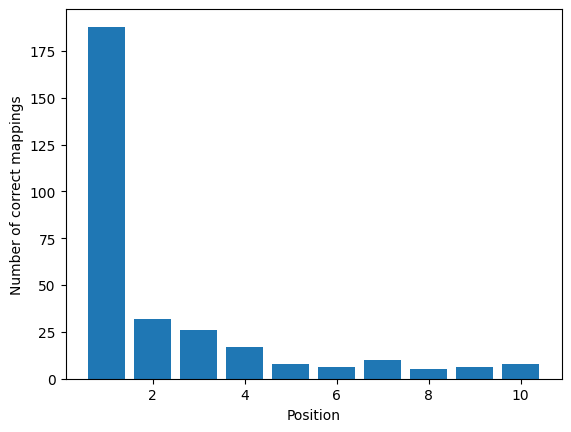

In [42]:

import json
from tqdm import tqdm
from util import CityProperty, Property, City
from sklearn.metrics import classification_report, precision_score
from compute_threshold import create_similarity_mapping
import matplotlib.pyplot as plt


def test_per_city(prop_per_city: dict[str, dict[str, CityProperty]]):
    pass


def test_all_properties(similarity_mapping: dict[str, dict[str, float]]) -> None:
    """Uses the property embeddings to test the compute_metric function"""

    positions = {idx: 0 for idx in range(1, len(similarity_mapping) + 1)}

    for property_id, value in tqdm(similarity_mapping.items()):
        # sort by embedding similarity
        ordered = sorted(value, key=value.get)
        position = ordered.index(property_id) + 1
        positions[position] = positions.get(position, 0) + 1

    print(positions)
    plt.title('')
    plt.xlabel('Position')
    plt.ylabel('Number of correct mappings')
    plt.bar(
        range(1, 11),
        list(positions.values())[:10],
        tick_label=list(positions.keys())
    )
    plt.show()


def main():
    """Tests the extracted word embeddings extracted from all-properties.json"""

    with open("./data/all_properties_with_emb.json", "r", encoding="utf-8") as inp:
        all_properties = json.load(inp)

    try:
        with open("./data/similarity-mappings.json", "r", encoding="utf-8") as inp:
            similarity_mapping = json.load(inp)
    except FileNotFoundError:
        similarity_mapping = create_similarity_mapping(all_properties)
        with open("./data/similarity-mappings.json", "w", encoding="utf-8") as out:
            json.dump(similarity_mapping, out)

    test_all_properties(similarity_mapping)
    print("---" * 20)
    test_per_city(all_properties)


if __name__ == "__main__":
    main()
